# Line-graph qubit routing: from kagome to heavy-hex and more
Joris Kattemölle and Seenivasan Hariharan
<hr/>

# Abstract

We showcase and benchmark line-graph qubit routing by routing random circuits (with fixed virtual graph) and circuits needed for the quantum simulation of the
Heisenberg antiferromagnet on various graphs. The code implementing line-routing itself is found in
`line_graph_routing.py` and maps Qiskit quantum circuits to Qiskit quantum circuits. (This can be altered to other circuit libraries with little effort.) We benchmark our results against other methods. The interactive version of this document is `README.ipynb`.

# Contents

1. Installation
1. Kagome to heavy-hex
1. Complete graph to star graph
1. Shuriken to heavy-square-octagon
1. Checkerboard to heavy-square
1. Random line graph to random heavy graph
1. Benchmarking

# Installation

Download and unpack the repository. Or, if you have git, run

``` bash
git clone https://github.com/kattemolle/LIGRAR.git
```

in a bash terminal. 

The necessary environment is recreated most easily with conda. Install [anaconda](https://docs.anaconda.com/free/anaconda/install/mac-os/) or [miniconda](https://docs.conda.io/projects/miniconda/en/latest/miniconda-install.html). After that, in a bash terminal, change the directory to the base directory of the LIGRAR repository, and run

```bash
conda env create --file environment.yml
conda activate ligrar
```

Optionally, to run the benchmarks against [OLSQ2](https://github.com/WanHsuanLin/OLSQ2), download and unpack the repository and put it the LIGRAR base folder. Or, in a terminal, change directory the LIGRAR base folder and run

``` bash
git clone git@github.com:WanHsuanLin/OLSQ2.git
```

We import line_graph routing and networkx by:

In [1]:
import line_graph_routing as lgr
import networkx as nx

# Kagome to heavy-hex
<a id='kagome_to_heavy-hex'></a>

## Random

Create a random circuit on a patch of the kagome lattice of $3\times 3$ unit cells and show the circuit's coupling graph. With probability 2/5, a CNOT is placed along an edge of the connectivity graph. With a probability 3/5 a gate from {H,S,T} is chosen uniformly at random and placed at a random node. 

740


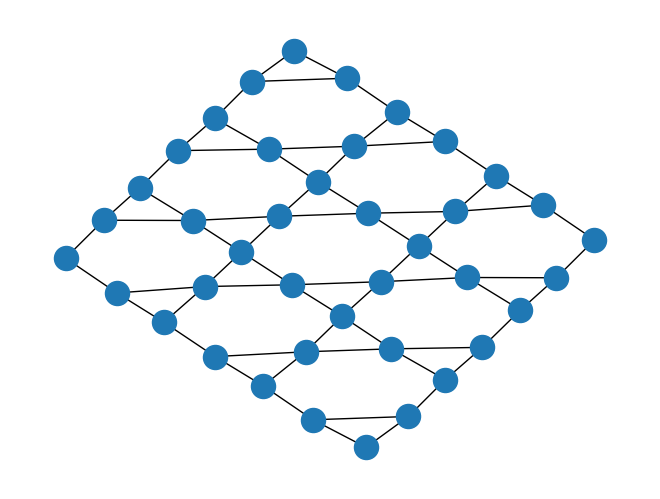

In [2]:
lg = lgr.kagome(3, 3)
qc = lgr.random_circuit(lg, 10**4)
cg = lgr.coupling_graph(qc)
nx.draw_kamada_kawai(cg)
print(qc.depth())

Route the circuit to a circuit with heavy-hex coupling graph.

1280


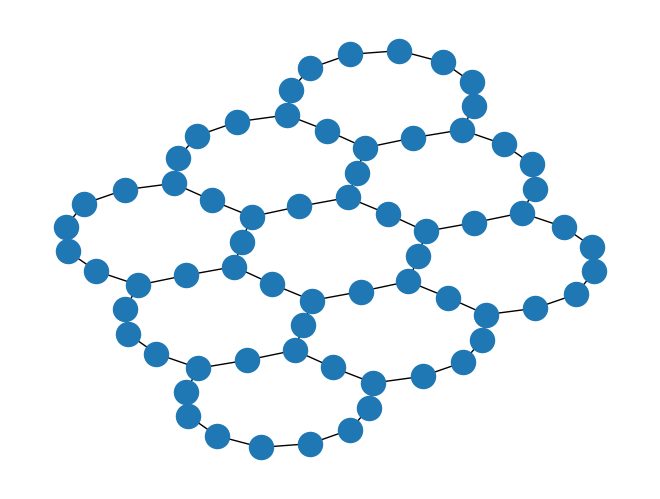

In [3]:
qc = lgr.line_graph_route(qc)
cg = lgr.coupling_graph(qc)
nx.draw_kamada_kawai(cg)
print(qc.depth())

## Quantum simulation

We base our circuits on edge colorings of the (kagome) lattice by identifying every color with a layer of $\mathrm{HEIS}$ gates. One of the colors (color '0') doubles as a color specifying the initial state by indicating along which edges singlet states are placed. The entire circuit is repeated $p$ times,  excluding initial state preparation. Every $\mathrm{HEIS}$ gets its own parameter. These parameters can later be bound to specific values to obtain circuits for dynamical quantum simulation or for simulated adiabatic state preparation. 

First,  create and show an edge coloring of the kagome lattice.

Matching is perfect
Edge coloring is minimal


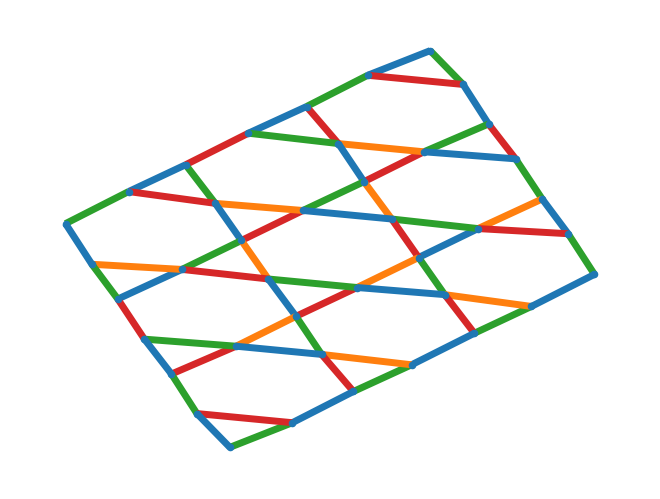

In [4]:
lg = lgr.edge_coloring(lg)
lgr.draw_edge_coloring(lg)

Create the associated circuit,  route it to heavy-hex hardware and show the coupling graph of the routed circuit.

5
11


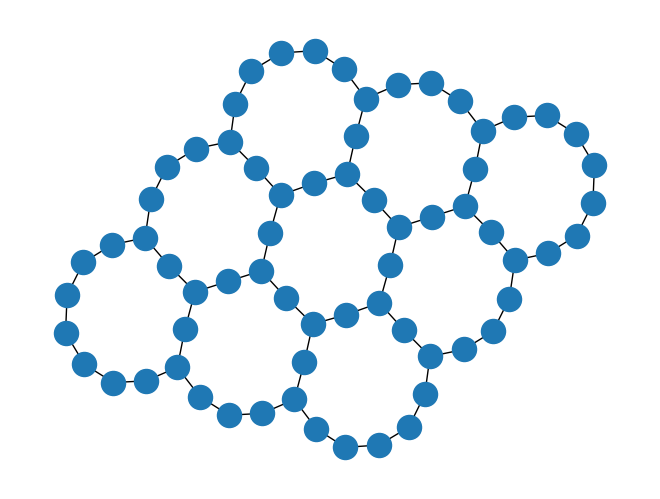

In [5]:
p = 1
qc = lgr.heis_circuit(lg, p)
print(qc.depth())
qc = lgr.line_graph_route(qc)
print(qc.depth())
cg = lgr.coupling_graph(qc)
nx.draw_kamada_kawai(cg)

Since the above circuit has the connectivity of a 2D graph, the corresponding quantum circuit diagram will not be very insightful. However, for a single unit cell of the kagome lattice, the routed quantum circuit becomes a circuit on a circle, which allows for a clear representation as a quantum circuit diagram. We first create an edge coloring of the unit cell patch. 

Matching is perfect
Edge coloring is minimal


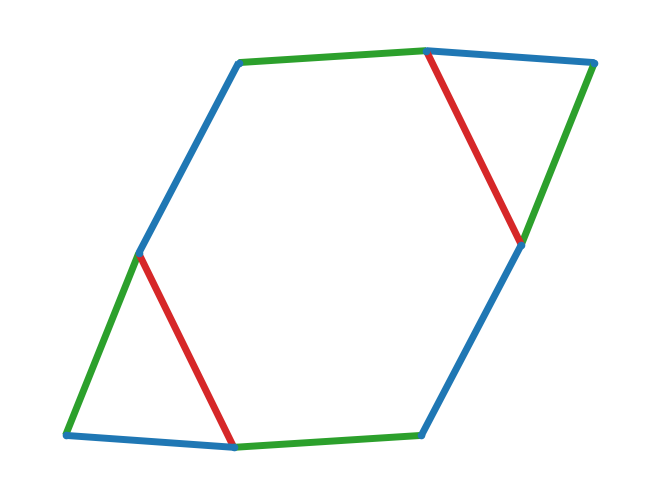

In [6]:
lg = lgr.kagome(1, 1)
lg = lgr.edge_coloring(lg)
lgr.draw_edge_coloring(lg)

Create the HEIS circuit ased on this coloring, map it to heavy-hex hardware, and show the coupling graph of the routed circuit. 

4
8


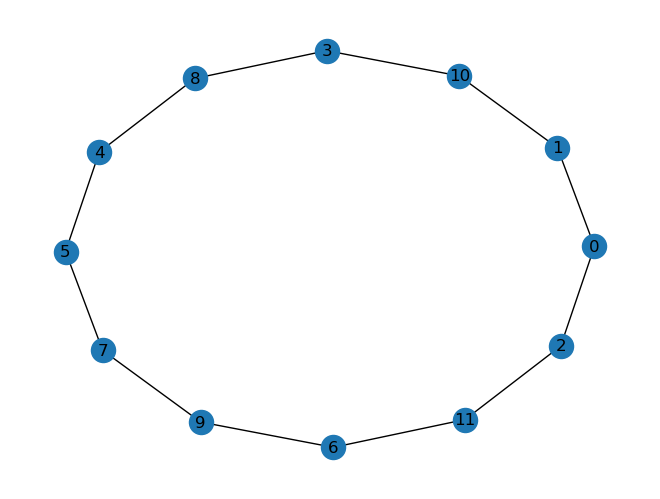

In [7]:
p = 1
qc = lgr.heis_circuit(lg, p)
print(qc.depth())
qc = lgr.line_graph_route(qc)
print(qc.depth())
cg = lgr.coupling_graph(qc)
nx.draw_kamada_kawai(cg, with_labels = 'true')

Show the circuit diagram of the routed circuit, with parameters `al_i`.

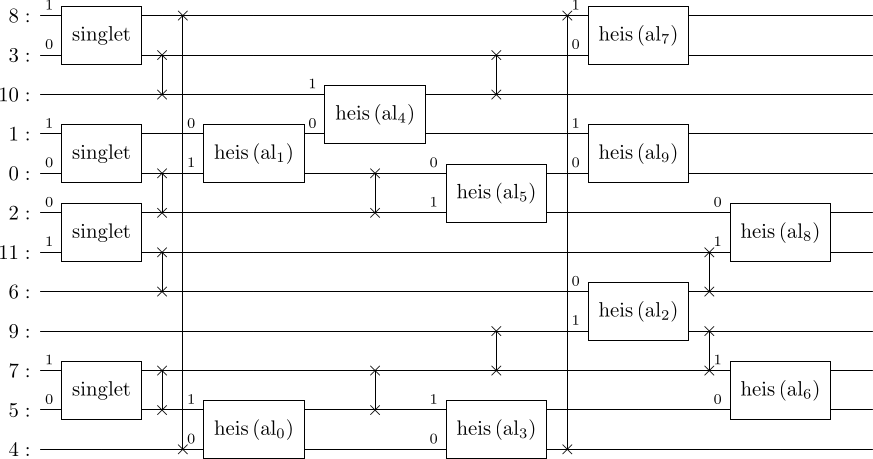

In [8]:
wo = [8,3,10,1,0,2,11,6,9,7,5,4] # In the circuit diagram, place qubits in this order.
qc.draw('latex', wire_order = wo)

# Complete graph to star graph

## Random

Create a random circuit on the complete graph of four nodes and show the circuit's coupling graph.

59


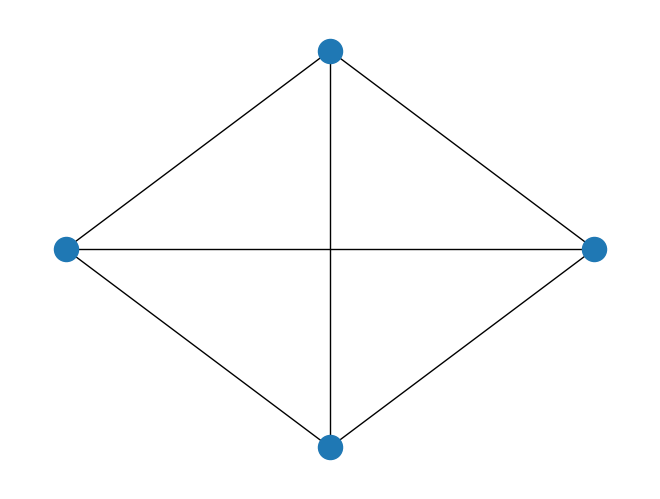

In [9]:
n = 5
lg = nx.complete_graph(4)
qc = lgr.random_circuit(lg, 10**2)
cg = lgr.coupling_graph(qc)
nx.draw_kamada_kawai(cg)
print(qc.depth())

Route the circuit to a circuit with star-graph connectivity. 

100


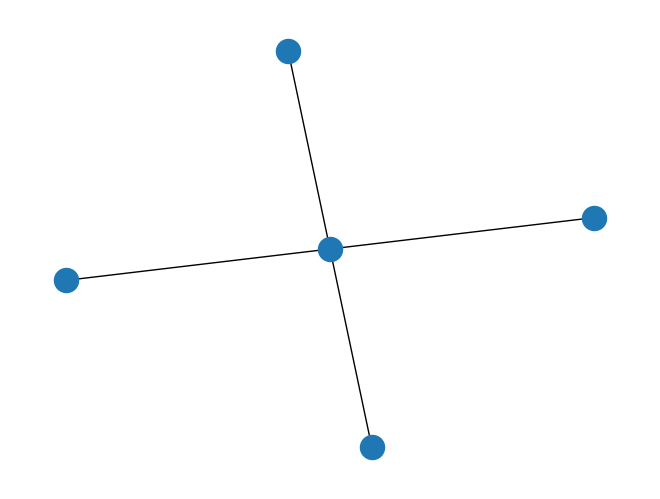

In [10]:
qc = lgr.line_graph_route(qc)
cg = lgr.coupling_graph(qc)
nx.draw_kamada_kawai(cg)
print(qc.depth())

## Quantum simulation

As before,  circuits are defined by identifying every color with a layer of $\mathrm{HEIS}$-gates. For more details,  see the `kagome to heavy-hex` section.

Create and show an edge coloring of the complete graph.

Matching is perfect
Edge coloring is minimal


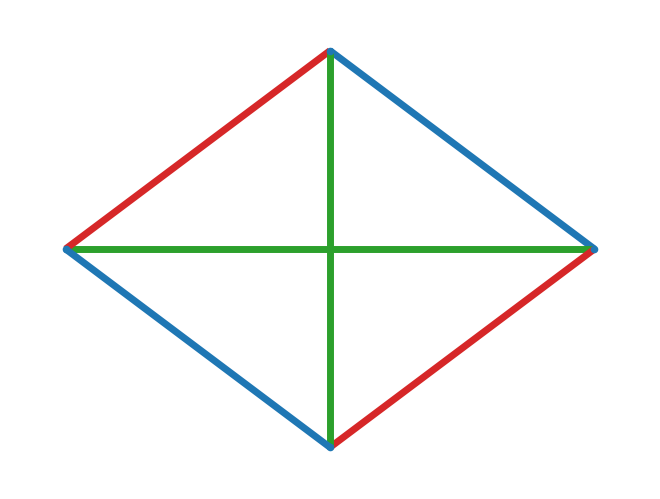

In [11]:
lg = lgr.edge_coloring(lg)
lgr.draw_edge_coloring(lg)

Create the associated circuit,  route it to heavy-hex hardware,  and show the coupling graph of the routed circuit.

4
20


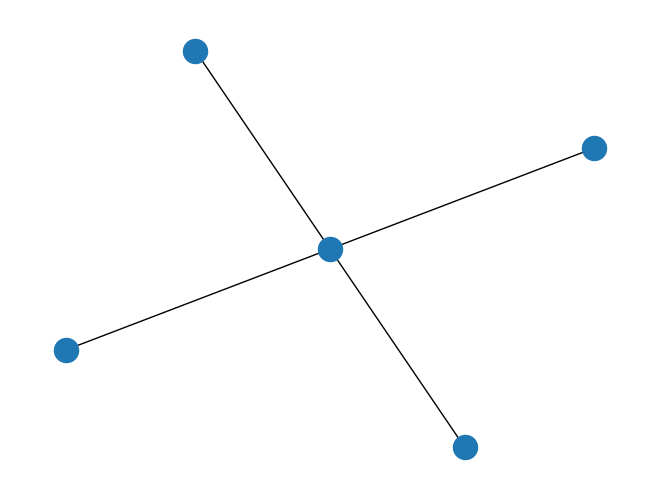

In [12]:
p = 1
qc = lgr.heis_circuit(lg, p)
print(qc.depth())
qc = lgr.line_graph_route(qc)
print(qc.depth())
cg = lgr.coupling_graph(qc)
nx.draw_kamada_kawai(cg)

We do not show the circuit diagram in this case because the routed circuit is not a circuit on a line.

# Shuriken to heavy square-octagon

## Random

Create a random circuit on a patch of the shuriken lattice of $3\times 3$ unit cells.

512


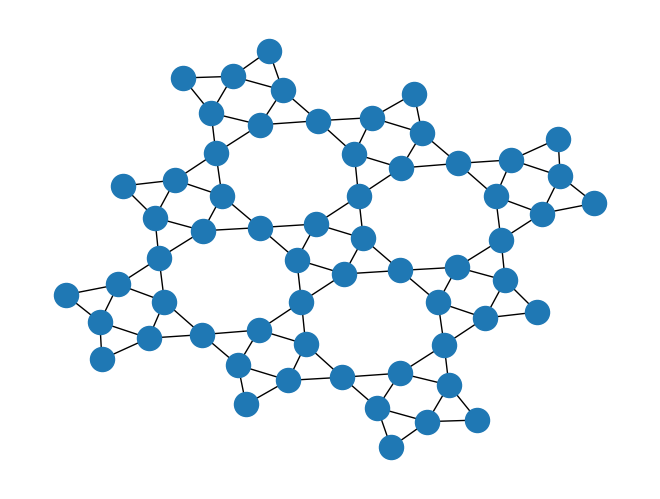

In [13]:
n = 5
lg = lgr.shuriken(3, 3)
qc = lgr.random_circuit(lg, 10**4)
cg = lgr.coupling_graph(qc)
nx.draw_kamada_kawai(cg)
print(qc.depth())

Route the circuit to a circuit with heavy-square-octagon connectivity.

856


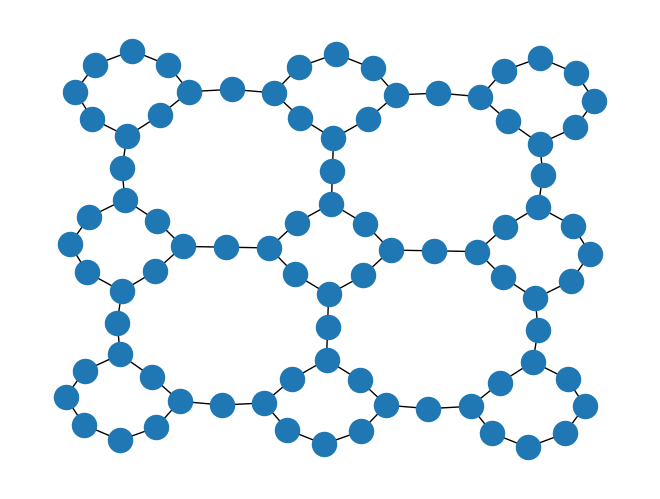

In [14]:
qc = lgr.line_graph_route(qc)
cg = lgr.coupling_graph(qc)
nx.draw_kamada_kawai(cg)
print(qc.depth())

## Quantum simulation

As before,  circuits are defined by identifying every color with a layer of $\mathrm{HEIS}$-gates. For more details,  see the `kagome to heavy-hex` section.

Create and show an edge coloring of the shuriken lattice.

Matching is perfect
Edge coloring is not minimal


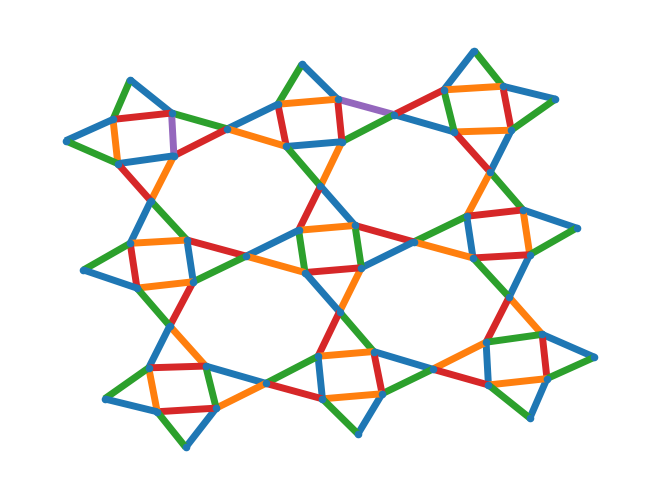

In [15]:
lg  =  lgr.edge_coloring(lg)
lgr.draw_edge_coloring(lg)

Create the associated circuit,  route it to heavy-square-octagon hardware,  and show the coupling graph of the routed circuit.

6
12


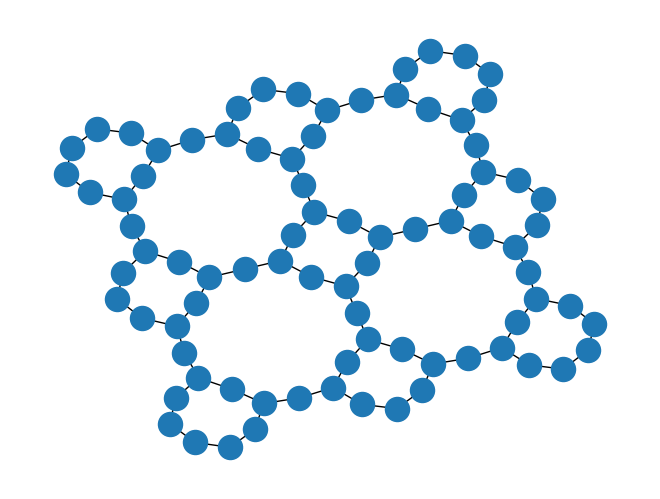

In [16]:
p = 1
qc = lgr.heis_circuit(lg, p)
print(qc.depth())
qc = lgr.line_graph_route(qc)
print(qc.depth())
cg = lgr.coupling_graph(qc)
nx.draw_kamada_kawai(cg)

Again, the resulting circuit diagram will not be very insightful, but it will be for a single-unit cell patch of the shuriken lattice. 

Matching is perfect
Edge coloring is minimal


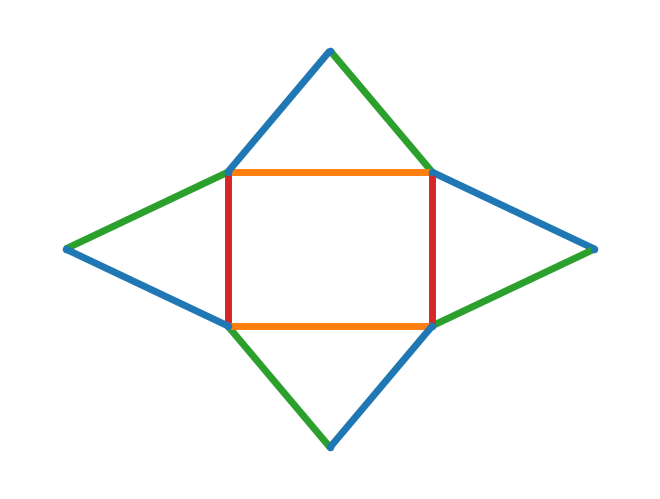

In [17]:
lg = lgr.shuriken(1, 1)
lg = lgr.edge_coloring(lg)
lgr.draw_edge_coloring(lg)

5
9


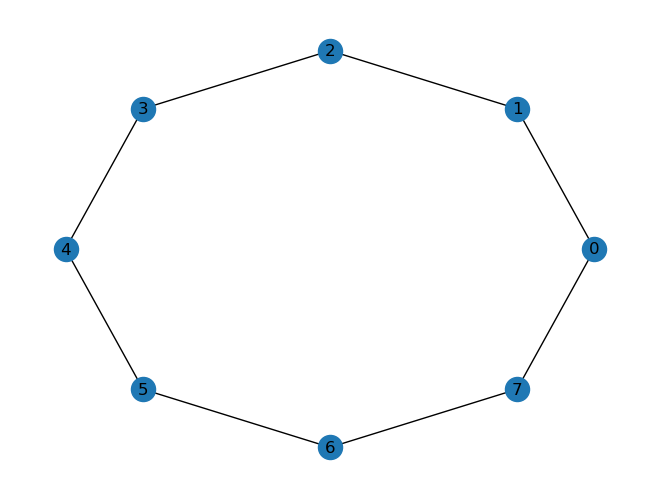

In [18]:
p = 1
qc = lgr.heis_circuit(lg, p)
print(qc.depth())
qc = lgr.line_graph_route(qc)
print(qc.depth())
cg = lgr.coupling_graph(qc)
nx.draw_kamada_kawai(cg, with_labels = 'true')

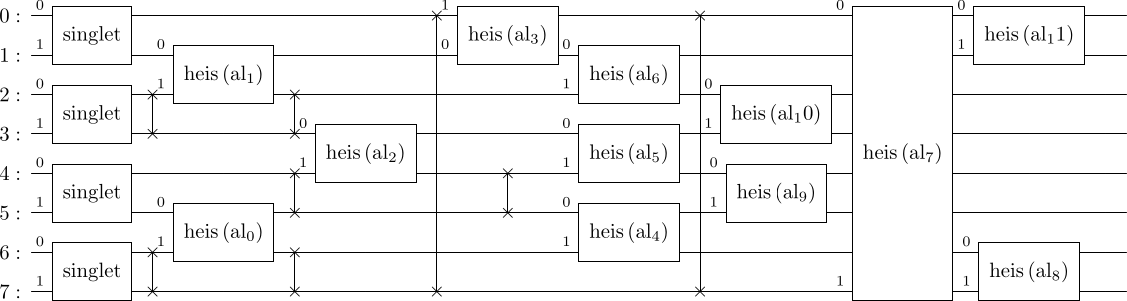

In [19]:
qc.draw('latex')

# Checkerboard to heavy-square

860


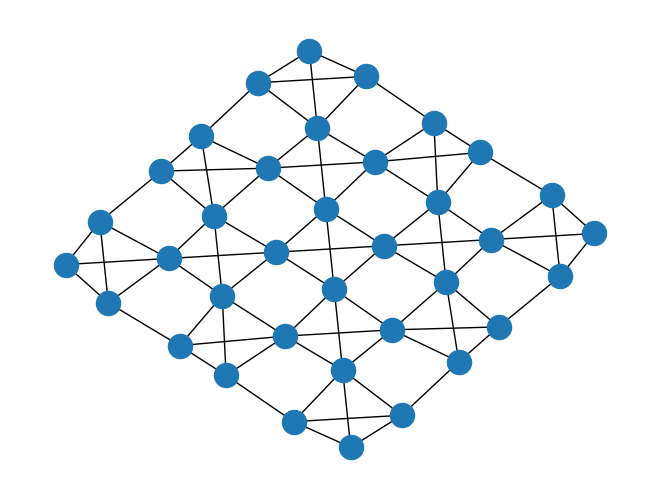

In [20]:
m = 2.5 
lg = lgr.checkerboard(m, m)
qc = lgr.random_circuit(lg, 10**4)
cg = lgr.coupling_graph(qc)
nx.draw_kamada_kawai(cg)
print(qc.depth())

Route the circuit to a circuit with a heavy-square coupling graph.

1644


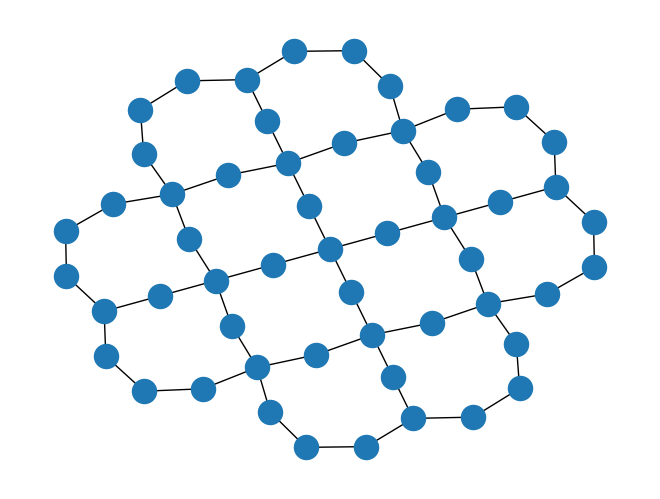

In [21]:
qc = lgr.line_graph_route(qc)
cg = lgr.coupling_graph(qc)
nx.draw_kamada_kawai(cg)
print(qc.depth())

## Quantum simulation

As before,  circuits are defined by identifying every color with a layer of $\mathrm{HEIS}$-gates. For more details,  see the `kagome to heavy-hex` section.

Create and show an edge coloring of the checkerboard lattice

Matching is perfect
Edge coloring is not minimal


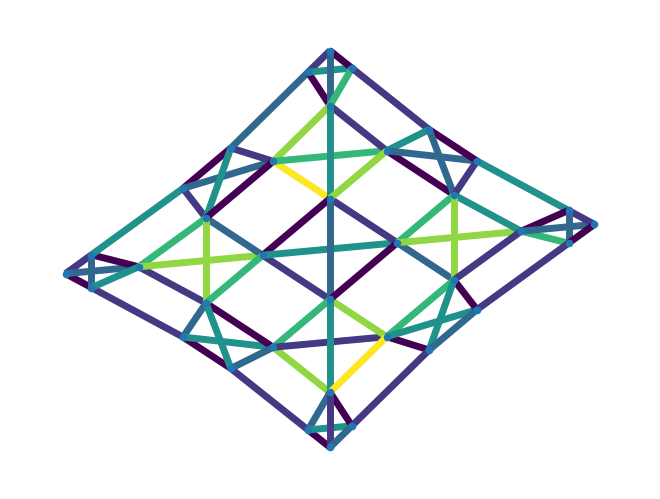

In [22]:
lg  =  lgr.edge_coloring(lg)
lgr.draw_edge_coloring(lg, spectral=True) # Use spactral method to find location of nodes.

Create the associated circuit,  route it to heavy-square-octagon hardware,  and show the coupling graph of the routed circuit.

8
33


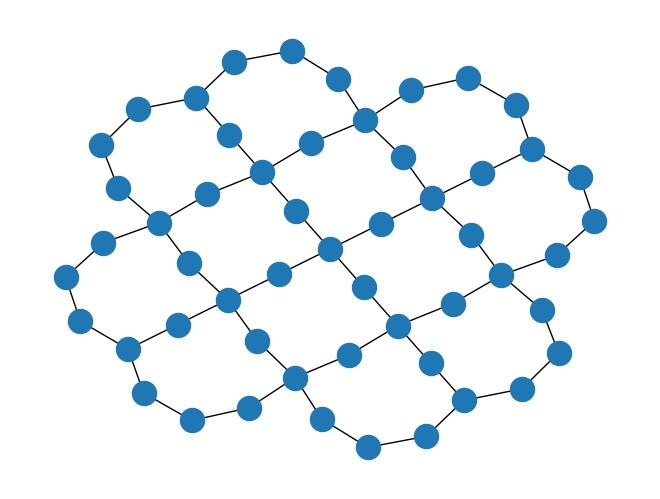

In [23]:
p = 1
qc = lgr.heis_circuit(lg, p)
print(qc.depth())
qc = lgr.line_graph_route(qc)
print(qc.depth())
cg = lgr.coupling_graph(qc)
nx.draw_kamada_kawai(cg)

# Random line graph to random heavy graph

## Random

Create a random circuit on a random graph with 6 nodes and show the circuit's coupling graph. For details on `radom_line_graph` generation,  see its function definition in `line_graph_routing.py`. 

267


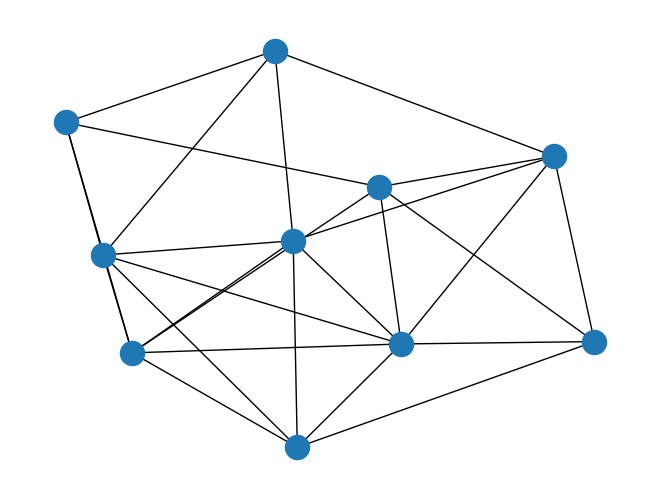

In [24]:
n = 6
lg = lgr.random_line_graph(6)
qc = lgr.random_circuit(lg, 10**3)
cg = lgr.coupling_graph(qc)
nx.draw_kamada_kawai(cg)
print(qc.depth())

Route the circuit to a circuit with the associated heavy connectivity. 

544


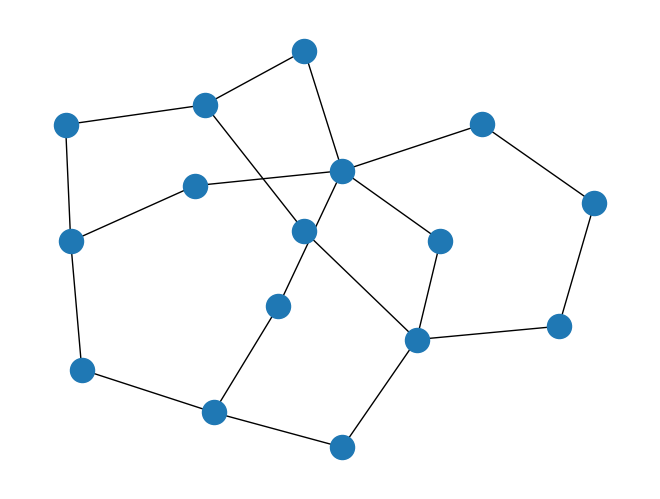

In [25]:
qc = lgr.line_graph_route(qc)
cg = lgr.coupling_graph(qc)
nx.draw_kamada_kawai(cg)
print(qc.depth())

## Quantum simulation

As before,  circuits are defined by identifying every color with a layer of $\mathrm{HEIS}$-gates. For more details,  see the `kagome to heavy-hex` section.

Create and show an edge coloring of random graph. The method we use to find a perfect matching (needed for initial state preparation) is limited and may not find a perfect matching even if it exists. If a perfect matching is not found,  try to create another random line graph (i.e.,  evaluate the two cells above) or use more sophisticated (or brute-force) methods to find a perfect matching. 

Matching is perfect
Edge coloring is minimal


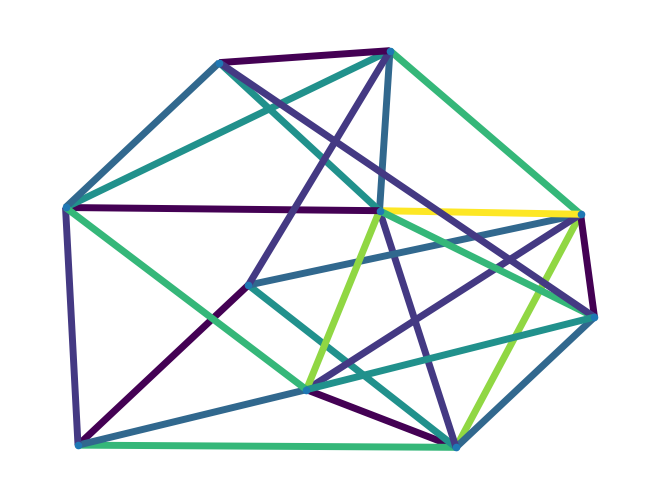

In [26]:
lg = lgr.edge_coloring(lg)
lgr.draw_edge_coloring(lg)

Create the associated circuit,  route it to heavy-hex hardware and show the coupling graph of the routed circuit.

8
34


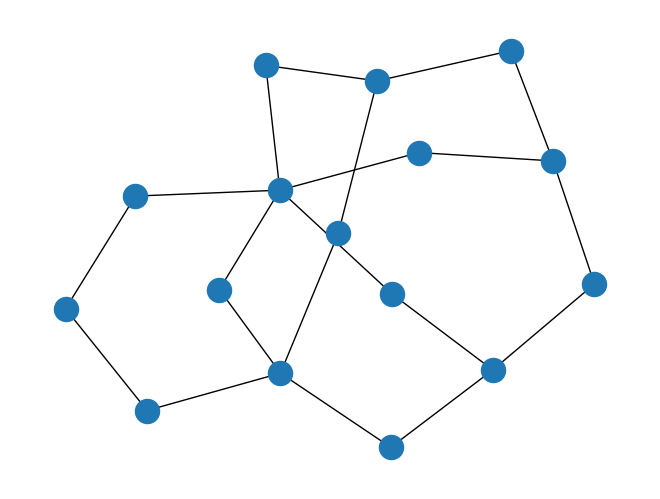

In [27]:
p = 1
qc = lgr.heis_circuit(lg, p)
print(qc.depth())
qc = lgr.line_graph_route(qc)
print(qc.depth())
cg = lgr.coupling_graph(qc)
nx.draw_kamada_kawai(cg)

We do not show the circuit diagram in this case because the routed circuit is not a circuit on a line.

# Benchmarking

We benchmark line graph routing by performing the above routing tasks (but for larger unit cells) using both line-graph qubit routing and all methods available in qiskit. These methods are 'basic', 'lookahead', 'stochastic', and 'sabre' [1]. We also benchmark against a solver-based method (OLSQ2). 

The benchmarking settings are specified by the following options:
- `name` The name of the virtual graph, either `kagome`, `shuriken` or `complete`.
- `size`. In case of `kagome` and `shuriken`: the size of the patch in unit cells by unit cells. In case of `complete`: the number of nodes of the complete graph.
- `circuit type`. Either `quantum simulation` or `random`, as presented in this notebook. 
- `p` In case of `kagome` and `shuriken`: the number of cycles of the circuit. In case of `complete`: the number of random gates from the set `H,T,S,CNOT`. 
- `repetitions`. The number of runs for the methods `sabre` and `stochastic`. The methods `line-graph` and `basic` are deterministic and hence only run once. Correspondingly, the reported `total time` pertains to the time taken for this single run in case of the latter two methods. 
- `optimization_level`. Either 0, 1, 2, or 3.  This specifies optimization level used for the routing methods implemented in qiskit [2]. This parameter is passed directly to Qiskit's transpiler [1]. 
- `methods`. The methods to benchmark line graph transpilation against. Must be a list containing elements from `['sabre','basic','lookahead',stochastic]`. These methods are passed directly to Qiskit's transpiler [1]. 

The methods `sabre` and `stochastic` are probabilistic, achieving a different routing each time they are run, and hence achieve different performance characteristics with each run. We therefore run these methods $repetitions$ times and report the average, confidence interval, and best performance out of these runs. Error bars on the data show the (symmetrized) 95% confidence interval and are obtained by bootstrapping the data. The error interval for `num_qubits` is sometimes given by `nan` because in those cases the number of qubits was equal for all runs. The routing methods`line-graph` and `basic` are deterministic and for these we enforce `repetitions=1`. 

We consider the following performance characteristics.
- `method` The routing method.
- `av. n_swaps` The average number of swaps obtained among the `repetitions` runs of the routing method.
- `min n_swap` The number of swaps of the run that achieved the lowest depth.
- `av. depth` The average depth of the routed circuits among the `repetitions` runs of the routing method. We focus on the performance of routing so none of the gates in any of the routing methods are compiled into hardware native gates. That is, for the purposes of assessing routing performance, we assume the gate set `SWAP`, `HEIS`, `H`, `X`, `Z`  `CNOT` for the quantum simulation circuits. For the random circuits we assume `SWAP`, `CNOT`, `H`, `S`, `T`.
- `min depth` The minimum depth among the `repetitions` runs of the routing method.
- `av. n_qubits` The average number obtained among the `repetitions` runs of the routing method. 
- `total time` The total wall clock time (in seconds) needed to perform all `repetitions` runs of the routing method. 
- `av. time` The average (minimum) wall clock time of the `repetitions` routing runs. 
- `min. time` The number wall clock run time of the run that achieved the lowest depth.



[1] Qiskit 0.43.0 documentation, https://qiskit.org/documentation/stubs/qiskit.compiler.transpile.html, accessed 11h May 2023.

[2] https://github.com/Qiskit/qiskit-terra/tree/main/qiskit/transpiler/preset_passmanagers

### Quantum simulation, kagome and shuriken, agianst SABRE

In [28]:
import line_graph_routing as lgr # Loading these makes these cells stand-alone
import pickle

settings=[]
for name in ['kagome','shuriken']:
    for side in [7]:#range(1,9,2):
        for p in [16]:#[1,8,16]:
            for optimization_level in range(4):
                setting = {'name':name,
                     'size': (side,side),
                     'circuit_type': 'quantum_simulation',
                     'p': p,
                     'repetitions' : 16,
                     'optimization_level' : optimization_level,
                     'methods' : ['sabre']
                    }
                settings.append(setting)
                                
## Uncomment to rerun benchmarks. This takes a couple of hours.
#results = []
#for setting in settings:
#    result = lgr.benchmark(**setting)
#    results.append(result)
#    lgr.print_benchmark(result)

#with open('benchmark_data/kagome_shuriken.pkl','wb') as f:
#    pickle.dump(results,f)

# Load previously obtained results from disk and show them. 
import pickle
with open('benchmark_data/kagome_shuriken.pkl','rb') as f:
    results = pickle.load(f)

for result in results:
    lgr.print_benchmark(result)

{\tiny
------------------------------------------------------------------------------------------------------------------------------------------------------
name = kagome, size = (1, 1), circuit_type = quantum_simulation, p = 1, repetitions = 16, optimization_level = 0

method      av. n_swaps      min. n_swap  av. depth       min. depth  av. n_qubits      min. qubits    total time (s)  av. time (s)      min. time (s)
----------  -------------  -------------  ------------  ------------  --------------  -------------  ----------------  --------------  ---------------
line-graph  12 ± 0.0                  12  7 ± 0.0                  7  12 ± 0.0                   12              0.08  0.08 ± 0.0                 0.08
sabre       16 ± 2.06                  6  12.38 ± 2.09             6  10.25 ± 1.0                12              0.7   0.04 ± 0.06                0.02
----------------------------------------------------------------------------------------------------------------------------

### Quantum simulation, checkerboard, agianst SABRE

In [29]:
import line_graph_routing as lgr # Loading these makes these cells stand-alone
import pickle

settings=[]
for name in ['checkerboard']:
    for side in [i+0.5 for i in range(1,9,2)]:
        for p in [1,8,16]:
            for optimization_level in range(4):
                setting={'name':name,
                     'size': (side,side),
                     'circuit_type': 'quantum_simulation',
                     'p': p,
                     'repetitions' : 16,
                     'optimization_level' : optimization_level,
                     'methods' : ['sabre']
                    }
                settings.append(setting)
                                
## Uncomment to rerun benchmarks. This takes a couple of hours.
#results=[]
#for setting in settings:
#    result=lgr.benchmark(**setting)
#    results.append(result)
#    lgr.print_benchmark(result)
#
#with open('benchmark_data/checkerboard.pkl','wb') as f:
#    pickle.dump(results,f)

#Load previously obtained results from disk and show them. 
import pickle
with open('benchmark_data/checkerboard.pkl','rb') as f:
    results=pickle.load(f)

for result in results:
    lgr.print_benchmark(result)

{\tiny
------------------------------------------------------------------------------------------------------------------------------------------------------
name = checkerboard, size = (1.5, 1.5), circuit_type = quantum_simulation, p = 1, repetitions = 16, optimization_level = 0

method      av. n_swaps      min. n_swap  av. depth       min. depth  av. n_qubits      min. qubits    total time (s)  av. time (s)      min. time (s)
----------  -------------  -------------  ------------  ------------  --------------  -------------  ----------------  --------------  ---------------
line-graph  42 ± 0.0                  42  27 ± 0.0                27  21 ± 0.0                   21              0.17  0.17 ± 0.0                 0.17
sabre       45 ± 1.28                 47  32.44 ± 1.97            27  19.06 ± 0.66               21              0.99  0.06 ± 0.03                0.03
------------------------------------------------------------------------------------------------------------------

### Random circuit, kagome and shuriken, against SABRE

In [30]:
import line_graph_routing as lgr # Loading these makes these cells stand-alone
import pickle

settings=[]
for name in ['kagome','shuriken']:
    for side in range(1,7,2):
        for p in [side**2*500]:
            for optimization_level in [1]:
                setting={'name':name,
                     'size': (side,side),
                     'circuit_type': 'random',
                     'p': p,
                     'repetitions' : 16,
                     'optimization_level' : optimization_level,
                     'methods' : ['sabre']
                    }
                settings.append(setting)
                                
## Uncomment to rerun benchmarks.
#results=[]
#for setting in settings:
#    result=lgr.benchmark(**setting)
#    results.append(result)
#    lgr.print_benchmark(result)
#
#with open('benchmark_data/random.pkl','wb') as f:
#    pickle.dump(results,f)

#Load previously obtained results from disk and show them. 
import pickle
with open('benchmark_data/random.pkl','rb') as f:
    results=pickle.load(f)

for result in results:
    lgr.print_benchmark(result)

{\tiny
------------------------------------------------------------------------------------------------------------------------------------------------------
name = kagome, size = (1, 1), circuit_type = random, p = 500, repetitions = 16, optimization_level = 1

method      av. n_swaps      min. n_swap  av. depth       min. depth  av. n_qubits      min. qubits    total time (s)  av. time (s)      min. time (s)
----------  -------------  -------------  ------------  ------------  --------------  -------------  ----------------  --------------  ---------------
line-graph  200 ± 0.0                200  249 ± 0.0              249  12 ± 0.0                   12              0.37  0.37 ± 0.0                 0.37
sabre       96 ± 0.62                 96  207.5 ± 1.19           205  12.0 ± nan                 12              1.17  0.07 ± 0.03                0.06
--------------------------------------------------------------------------------------------------------------------------------------

### Random circuit, complete graph, against SABRE

In [31]:
import line_graph_routing as lgr
import pickle

settings=[]
for name in ['complete']:
    for side in range(3,10,2):
        for p in [side*100]:
            for optimization_level in range(2):
                setting={'name':name,
                         'size': side,
                         'circuit_type': 'random',
                         'p': p,
                         'repetitions' : 16,
                         'optimization_level' : optimization_level,
                         'methods' : ['sabre']
                    }
                settings.append(setting)

## Uncomment to rerun benchmarks
#results=[]
#for setting in settings:
#    result=lgr.benchmark(**setting)
#    results.append(result)
#    lgr.print_benchmark(result)

#with open('benchmark_data/complete.pkl','wb') as f:
#    pickle.dump(results,f)

with open('benchmark_data/complete.pkl','rb') as f:
    results=pickle.load(f)

for result in results:
    lgr.print_benchmark(result)

{\tiny
------------------------------------------------------------------------------------------------------------------------------------------------------
name = complete, size = 3, circuit_type = random, p = 300, repetitions = 16, optimization_level = 0

method      av. n_swaps      min. n_swap  av. depth        min. depth  av. n_qubits      min. qubits    total time (s)  av. time (s)      min. time (s)
----------  -------------  -------------  -------------  ------------  --------------  -------------  ----------------  --------------  ---------------
line-graph  154 ± 0.0                154  334 ± 0.0               334  4 ± 0.0                     4              0.12  0.12 ± 0.0                 0.12
sabre       40 ± 0.97                 37  267.88 ± 2.34           257  3.0 ± nan                   3              1.01  0.06 ± 0.06                0.04
-------------------------------------------------------------------------------------------------------------------------------------

### Against other routing methods

Above, we only ran SABRE because it outperforms the other methods available in Qiskit by default. The standard methods available are

In [32]:
from qiskit import transpiler 
transpiler.preset_passmanagers.plugin.list_stage_plugins('routing')

['basic', 'lookahead', 'none', 'sabre', 'stochastic']

In [33]:
import line_graph_routing as lgr
import pickle

settings=[]
for name in ['kagome','shuriken']:
    for side in [1]:
        for p in [1]:
            for optimization_level in [3]:
                setting={'name':name,
                         'size': (side,side),
                         'circuit_type': 'quantum_simulation',
                         'p': p,
                         'repetitions' : 16,
                         'optimization_level' : optimization_level,
                         'methods' : ['basic', 'lookahead', 'sabre', 'stochastic']
                    }
                settings.append(setting)

## Uncomment to rerun benchmarks
#results=[]
#for setting in settings:
#    result=lgr.benchmark(**setting)
#    results.append(result)
#    lgr.print_benchmark(result)

#with open('benchmark_data/other_methods_1x1.pkl','wb') as f:
#    pickle.dump(results,f)

with open('benchmark_data/other_methods_1x1.pkl','rb') as f:
    results=pickle.load(f)

for result in results:
    lgr.print_benchmark(result)

{\tiny
------------------------------------------------------------------------------------------------------------------------------------------------------
name = kagome, size = (1, 1), circuit_type = quantum_simulation, p = 1, repetitions = 16, optimization_level = 3

method      av. n_swaps      min. n_swap  av. depth      min. depth  av. n_qubits      min. qubits    total time (s)  av. time (s)      min. time (s)
----------  -------------  -------------  -----------  ------------  --------------  -------------  ----------------  --------------  ---------------
line-graph  12 ± 0.0                  12  7 ± 0.0                 7  12 ± 0.0                   12              0.08  0.08 ± 0.0                 0.08
basic       14 ± 0.0                  14  17.0 ± 0.0             17  8.0 ± 0.0                   8              0.05  0.05 ± 0.0                 0.05
lookahead   8 ± nan                    8  8.81 ± 0.19             8  8.0 ± nan                   8             19.55  1.22 ± 0.0

The method 'lookahead' takes an impractical amount of time, so we exclude it when running benchmarks for larger/deeper circuits.

In [34]:
import line_graph_routing as lgr
import pickle

settings=[]
for name in ['kagome','shuriken']:
    for side in [3]:
        for p in [3]:
            for optimization_level in [3]:
                setting={'name':name,
                         'size': (side,side),
                         'circuit_type': 'quantum_simulation',
                         'p': p,
                         'repetitions' : 16,
                         'optimization_level' : optimization_level,
                         'methods' : ['basic', 'sabre', 'stochastic']
                    }
                settings.append(setting)

## Uncomment to rerun benchmarks
#results=[]
#for setting in settings:
#    result=lgr.benchmark(**setting)
#    results.append(result)
#    lgr.print_benchmark(result)
#
#with open('benchmark_data/other_methods_3x3.pkl','wb') as f:
#    pickle.dump(results,f)

with open('benchmark_data/other_methods_3x3.pkl','rb') as f:
    results=pickle.load(f)

for result in results:
    lgr.print_benchmark(result)

{\tiny
------------------------------------------------------------------------------------------------------------------------------------------------------
name = kagome, size = (3, 3), circuit_type = quantum_simulation, p = 3, repetitions = 16, optimization_level = 3

method      av. n_swaps      min. n_swap  av. depth       min. depth  av. n_qubits      min. qubits    total time (s)  av. time (s)      min. time (s)
----------  -------------  -------------  ------------  ------------  --------------  -------------  ----------------  --------------  ---------------
line-graph  336 ± 0.0                336  43 ± 0.0                43  68 ± 0.0                   68              1.33  1.33 ± 0.0                 1.33
basic       475 ± 0.0                475  287.0 ± 0.0            287  45.0 ± 0.0                 45              1.21  1.21 ± 0.0                 1.21
sabre       215 ± 3.56               203  63.25 ± 3.78            50  43.94 ± 0.97               45             12.37  0.77 

We see SABRE outperforms the other methods available by default in Qiskit, but not line-graph routing for the circuits considered. 

### Wall-clock time of line-graph routing

Create a random graph, construct the line graph, create a circuit on the line graph, and put this circuit into line-graph routing. The benchmark is carried out on a 2019 MacBook Pro (16 inch, 2,6 GHz 6-Core Intel Core i7, 16 GB RAM) using a single thread. 

In [35]:
from time import time
side = 25
lg = lgr.kagome(side, side)
print('number of nodes =',lg.number_of_nodes())
La=10**5
print('number of gates =',La)
qc = lgr.random_circuit(lg, La)
begin = time()
qc = lgr.line_graph_route(qc)
end = time()
print('wall clock time =',end-begin,'(s)')

number of nodes = 1976
number of gates = 100000
wall clock time = 26.690221071243286 (s)


### Against solver-based method

We run a small set of benchmarks of line graph routing against the optimal routing method [OLSQ2](https://ieeexplore.ieee.org/abstract/document/10247760). The cell is stand-alone but requires OLSQ2, which is achieved by 

```bash
git clone git@github.com:WanHsuanLin/OLSQ2.git
```

The dependencies of OLSQ2 are already contained in `environment.yml`. That is, they were already installed by `conda env create --file environment.yml`. 

We first benchmark line-graph routing against OLSQ2 on the following problem: **route the quantum simulation circuit on a 1x1 patch of the kagome lattice with $p$ trotter steps to quantum hardware whose connectivity is a 1x1 patch of the heavy-hex lattice**. (See the section [kagome to heavy-hex](#kagome_to_heavy-hex).) As the optimization objective of OLSQ2, we set the number of SWAP gates. Setting the number of SWAP gates as the objective reveals the minimum number of SWAPs required. In the current benchmark, we empirically found that this approach does not increase the circuit depth compared to running OLSQ2 with depth as the optimization objective.

We observed that the exact edge coloring produced by `lgr.edge_coloring()`, and consequently the quantum circuits derived from those colorings, are correct but not reproducible across different installations of LIGRAR. To ensure consistency in the routing tasks given to OLSQ2, as compared to those used for line-graph routing and SABRE in earlier sections, we hard-code the edge colorings below. This guarantees they match the ones used in the previous benchmarks exactly. Again, benchmarks are carried out on a 2019 MacBook Pro (16 inch, 2,6 GHz 6-Core Intel Core i7, 16 GB RAM) using a single thread. 

In [36]:
# Uncomment to rerun
# import line_graph_routing as lgr
# import networkx as nx

# # For consistency with previous benchmarks
# kagome11 = nx.Graph([(0, 1, {'color': 2}), (0, 6, {'color': 1}), (0, 3, {'color': 0}), (1, 3, {'color': 1}), (1, 7, {'color': 0}), (2, 5, {'color': 1}), (2, 4, {'color': 0}), (4, 5, {'color': 2}), (4, 7, {'color': 1}), (5, 6, {'color': 0})])

# for p in range(1,7):
#     lgr.benchmark_against_OLSQ2(kagome11,p,obj_is_swap=True)

The output is stored in `benchmark_data/vs_OLSQ2_kagome11_p=1-6.out` and summarized in the following table. 

| L(G)       | p   | Routing method | depth | n_SWAP | n_qubit | t_tot     |
| ---        | --- | ---            | ---   | ---    | ---     | ---       |   
| kagome 1x1 | 1   | line-graph     | 7     | 12     | 12      | 0.01 s    |
| kagome 1x1 | 1   | OLSQ2          | 6     | 6      | 8       | 12 s      |
| kagome 1x1 | 2   | line-graph     | 13    | 24     | 12      | 0.01 s    |
| kagome 1x1 | 2   | OLSQ2          | 11    | 12     | 8       | 40 s      |
| kagome 1x1 | 3   | line-graph     | 19    | 36     | 12      | 0.01 s    |
| kagome 1x1 | 3   | OLSQ2          | 16    | 18     | 8       | 100 s     |
| kagome 1x1 | 4   | line-graph     | 25    | 48     | 12      | 0.02 s    |
| kagome 1x1 | 4   | OLSQ2          | 21    | 24     | 8       | 198 s     |
| kagome 1x1 | 5   | line-graph     | 31    | 60     | 12      | 0.02 s    |
| kagome 1x1 | 5   | OLSQ2          | 26    | 30     | 8       | 297 s     |
| kagome 1x1 | 6   | line-graph     | 37    | 72     | 12      | 0.03 s    |
| kagome 1x1 | 6   | OLSQ2          | 31    | 36     | 8       | 416 s     |

For p=[1,...,6], we see line-graph routing has a depth overhead of 1 layer per trotter step compared to the optimal solution found by OLSQ2. 

Next, we route the quantum simulation circuit on a 3x3 patch of the kagome lattice to heavy-hex hardware. Again, we hard-code the colorings for compatibility. We do not put the swap count as the minimization objective because it is more costly. Instead, depth is taken as the optimization objective.  

In [37]:
import networkx as nx
kagome22 = nx.Graph([((0, 0, 0), (0, 0, 1), {"color": 2}), ((0, 0, 0), (0, 0, 2), {"color": 0}), ((0, 0, 1), (0, 0, 2), {"color": 3}), ((0, 0, 1), (1, 0, 0), {"color": 1}), ((0, 0, 2), (0, 1, 0), {"color": 2}), ((1, 0, 0), (1, 0, 2), {"color": 0}), ((1, 0, 0), (1, 0, 1), {"color": 2}), ((1, 0, 2), (1, 1, 0), {"color": 2}), ((1, 0, 2), (0, 1, 1), {"color": 1}), ((1, 0, 2), (1, 0, 1), {"color": 3}), ((1, 1, 0), (0, 1, 1), {"color": 3}), ((1, 1, 0), (1, 1, 2), {"color": 1}), ((1, 1, 0), (1, 1, 1), {"color": 0}), ((0, 1, 0), (0, 1, 1), {"color": 0}), ((0, 1, 0), (0, 1, 2), {"color": 1}), ((0, 1, 1), (0, 1, 2), {"color": 2}), ((0, 1, 2), (0, 2, 0), {"color": 3}), ((1, 1, 2), (1, 2, 0), {"color": 3}), ((1, 1, 2), (0, 2, 1), {"color": 0}), ((1, 1, 2), (1, 1, 1), {"color": 2}), ((1, 2, 0), (0, 2, 1), {"color": 1}), ((1, 2, 0), (1, 2, 1), {"color": 2}), ((0, 2, 0), (0, 2, 1), {"color": 2}), ((1, 0, 1), (2, 0, 0), {"color": 1}), ((2, 0, 0), (2, 0, 2), {"color": 0}), ((2, 0, 2), (2, 1, 0), {"color": 2}), ((2, 0, 2), (1, 1, 1), {"color": 1}), ((2, 1, 0), (1, 1, 1), {"color": 3}), ((2, 1, 0), (2, 1, 2), {"color": 1}), ((2, 1, 2), (2, 2, 0), {"color": 3}), ((2, 1, 2), (1, 2, 1), {"color": 0}), ((2, 2, 0), (1, 2, 1), {"color": 1})])
kagome22 = nx.convert_node_labels_to_integers(kagome22) 
kagome33 = nx.Graph([(0, 1, {'color': 0}), (0, 11, {'color': 1}), (0, 21, {'color': 3}), (1, 30, {'color': 2}), (1, 33, {'color': 1}), (2, 3, {'color': 2}), (2, 29, {'color': 0}), (2, 28, {'color': 1}), (3, 15, {'color': 1}), (3, 28, {'color': 0}), (4, 5, {'color': 1}), (4, 38, {'color': 0}), (4, 13, {'color': 3}), (5, 13, {'color': 2}), (5, 39, {'color': 0}), (6, 7, {'color': 3}), (6, 25, {'color': 0}), (6, 35, {'color': 1}), (6, 23, {'color': 2}), (7, 11, {'color': 0}), (7, 23, {'color': 1}), (8, 9, {'color': 1}), (8, 27, {'color': 0}), (8, 34, {'color': 4}), (9, 31, {'color': 4}), (9, 32, {'color': 0}), (10, 20, {'color': 2}), (10, 24, {'color': 1}), (10, 37, {'color': 0}), (11, 21, {'color': 2}), (12, 13, {'color': 1}), (12, 14, {'color': 3}), (12, 26, {'color': 0}), (12, 17, {'color': 2}), (13, 17, {'color': 0}), (14, 24, {'color': 0}), (14, 25, {'color': 1}), (14, 26, {'color': 2}), (15, 16, {'color': 2}), (15, 20, {'color': 0}), (16, 19, {'color': 0}), (16, 20, {'color': 1}), (16, 26, {'color': 3}), (17, 18, {'color': 1}), (17, 34, {'color': 3}), (18, 35, {'color': 3}), (18, 36, {'color': 2}), (18, 34, {'color': 0}), (19, 26, {'color': 1}), (19, 29, {'color': 2}), (19, 38, {'color': 3}), (21, 36, {'color': 1}), (21, 31, {'color': 0}), (22, 23, {'color': 0}), (22, 37, {'color': 1}), (24, 25, {'color': 3}), (24, 37, {'color': 2}), (25, 35, {'color': 2}), (27, 34, {'color': 2}), (27, 39, {'color': 1}), (29, 38, {'color': 1}), (30, 33, {'color': 0}), (30, 32, {'color': 1}), (31, 32, {'color': 2}), (31, 36, {'color': 3}), (35, 36, {'color': 0})])

In [38]:
# # Uncomment to rerun benchmarks
#import line_graph_routing as lgr
# lgr.benchmark_against_OLSQ2(kagome22,1)
# lgr.benchmark_against_OLSQ2(kagome22,2)
# lgr.benchmark_against_OLSQ2(kagome22,3)
# lgr.benchmark_against_OLSQ2(kagome22,4)
# lgr.benchmark_against_OLSQ2(kagome33,1)
# lgr.benchmark_against_OLSQ2(kagome33,2)

Results are stored in `benchmark_data` and summarized in the tables below. 

| L(G)       | p   | Routing method | depth | n_SWAP | n_qubit | t_tot     |
| ---        | --- | ---            | ---   | ---    | ---     | ---       | 
| kagome 2x2 | 1   | Line-graph     | 13    | 46     | 35      | 0.02 s    |
| kagome 2x2 | 1   | OLSQ2          | 8     | 53     | 35      | 12 m      |
| kagome 2x2 | 2   | Line-graph     | 25    | 94     | 35      | 0.02 s    |
| kagome 2x2 | 2   | OLSQ2          | 16    | 111    | 35      | 2.6 h     |
| kagome 2x2 | 3   | Line-graph     | 37    | 142    | 35      | 0.04 s    |
| kagome 2x2 | 3   | OLSQ2          | 24    | 192    | 35      | 25 h      |
| kagome 2x2 | 4   | Line-graph     | 49    | 190    | 35      | 0.06 s    |
| kagome 2x2 | 4   | OLSQ2          | >= 30 | ?      | ?       | 100 h     |


| L(G)       | p   | Routing method | depth | n_SWAP | n_qubit | t_tot     |
| ---        | --- | ---            | ---   | ---    | ---     | ---       | 
| kagome 3x3 | 1   | Line-graph     | 15    | 112    | 68      | 0.05 s    |
| kagome 3x3 | 1   | OLSQ2          | 9     | 103    | 68      | 7.8 h     |
| kagome 3x3 | 2   | Line-graph     | 29    | 224    | 68      | 0.06 s    |
| kagome 3x3 | 2   | OLSQ2          | >= 11 | ?      | ?       | 100 h     |

In the last two lines of the above two tables, OLSQ2 did not complete before the timeout of 100 h. In those cases, the best achieved lower bound on the circuit depth is shown. 